In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
from astropy.io import fits

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def process_fits_files(directory):
    """
    Processes FITS files in a specified directory to extract max and average pixel values,
    and the top 5 maximum pixel locations.

    Parameters:
    - directory: The directory containing the FITS files.

    Returns:
    - A DataFrame containing the filename, max pixel value, average pixel value, and top 5 max locations.
    """
    data = []

    # Get a sorted list of filenames
    filenames = sorted([f for f in os.listdir(directory) if f.endswith('.fit')], key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Iterate through the sorted files
    for filename in filenames:
        fits_file = os.path.join(directory, filename)
        with fits.open(fits_file) as hdul:
            image_data = np.array(hdul[0].data, dtype=float)
            max_pixel_value = np.max(image_data)
            average_pixel_value = np.mean(image_data)
            
            # Find the top 5 locations of the max pixel value
            max_locs = np.unravel_index(np.argpartition(image_data.ravel(), -5)[-5:], image_data.shape)
            max_locs = [(x, y) for x, y in zip(max_locs[0], max_locs[1])]

            # Append data to the list
            entry = [filename, max_pixel_value, average_pixel_value] + max_locs
            data.append(entry)

    # Create DataFrame
    columns = ['File', 'Max Pixel Value', 'Average Pixel Value'] + [f'Max Loc {i}' for i in range(1, 6)]
    df = pd.DataFrame(data, columns=columns)

    return df


def display_image_with_max_locations(row, directory):
    """
    Displays an image from a FITS file with red circles around maximum pixel locations.

    Parameters:
    - row: A row from the DataFrame containing the filename and max locations.
    - directory: The directory where the FITS files are stored.
    """
    # Extract filename and prepare file path
    filename = row['File']
    fits_file = os.path.join(directory, filename)

    # Open the FITS file and get the image data
    with fits.open(fits_file) as hdul:
        image_data = np.array(hdul[0].data, dtype=float)

    # Setup the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    img_plot = ax.imshow(image_data, cmap='gray', origin='lower', vmin=np.percentile(image_data, 5), vmax=np.percentile(image_data, 95))

    # Add red circles at max locations
    max_locations = [row[f'Max Loc {i}'] for i in range(1, 6)]
    for loc in max_locations:
        circle = Circle((loc[1], loc[0]), radius=10, color='red', fill=False, linewidth=2)
        ax.add_patch(circle)

    # Add a colorbar and show the plot
    plt.colorbar(img_plot)
    plt.show()

In [4]:
# Example usage:
directory = '/Users/jwatts/astrophotography/Photometry/4.16/Light/WUMa/'
df = process_fits_files(directory)
df[0:200]

,File,Max Pixel Value,Average Pixel Value,Max Loc 1,Max Loc 2,Max Loc 3,Max Loc 4,Max Loc 5
0,Light_WUMa_10.0s_Bin1_20240416-204402_0001.fit,11508.0,1934.195756,"(1366, 2099)","(1369, 2100)","(1368, 2099)","(1368, 2101)","(1367, 2100)"
1,Light_WUMa_10.0s_Bin1_20240416-204703_0002.fit,9348.0,1933.566963,"(1373, 2102)","(1376, 2103)","(1375, 2102)","(1374, 2103)","(1375, 2104)"
2,Light_WUMa_10.0s_Bin1_20240416-205004_0003.fit,9604.0,1933.858677,"(1362, 2102)","(1363, 2104)","(1364, 2103)","(1363, 2102)","(1362, 2103)"
3,Light_WUMa_10.0s_Bin1_20240416-205305_0004.fit,9136.0,1934.293555,"(1357, 2102)","(1356, 2101)","(1356, 2103)","(1354, 2101)","(1355, 2102)"
4,Light_WUMa_10.0s_Bin1_20240416-205606_0005.fit,8824.0,1934.532412,"(1374, 2104)","(1376, 2105)","(1375, 2104)","(1375, 2106)","(1374, 2105)"
5,Light_WUMa_10.0s_Bin1_20240416-205907_0006.fit,8884.0,1935.980656,"(1367, 2106)","(1369, 2104)","(1370, 2105)","(1369, 2106)","(1368, 2105)"
6,Light_WUMa_10.0s_Bin1_20240416-210207_0007.fit,9600.0,1935.455665,"(1348, 2103)","(1350, 2105)","(1351, 2104)","(1350, 2103)","(1349, 2104)"
7,Light_WUMa_10.0s_Bin1_20240416-210509_0008.fit,10480.0,1936.250698,"(1372, 2107)","(1369, 2108)","(1370, 2107)","(1371, 2108)","(1370, 2109)"
8,Light_WUMa_10.0s_Bin1_20240416-210810_0009.fit,8392.0,1936.657541,"(1367, 2108)","(1365, 2108)","(1368, 2109)","(1367, 2110)","(1366, 2109)"
9,Light_WUMa_10.0s_Bin1_20240416-211111_0010.fit,8864.0,1938.450292,"(1345, 2106)","(1347, 2106)","(1348, 2107)","(1346, 2107)","(1347, 2108)"


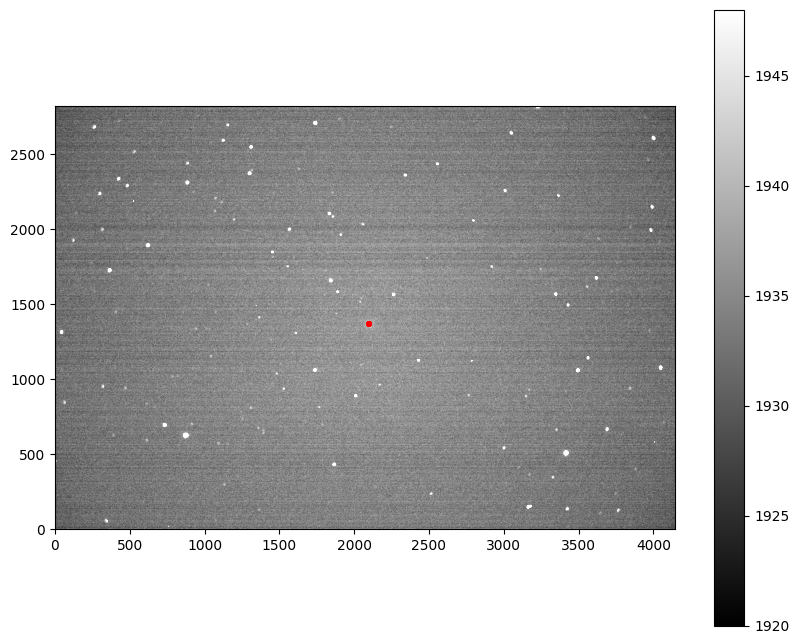

In [5]:
display_image_with_max_locations(df.iloc[0], directory)